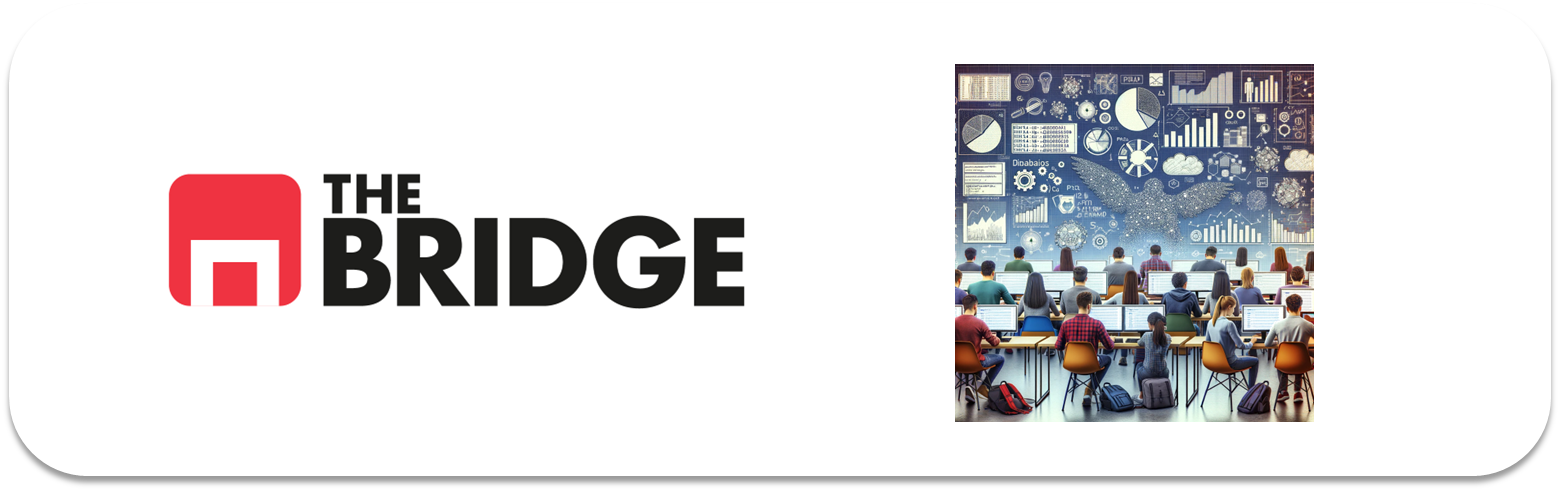

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [10]:
import pandas as pd

file_path = './data/hard_to_find/obligatoria_hard.csv'
data = pd.read_csv(file_path, delimiter='|')

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


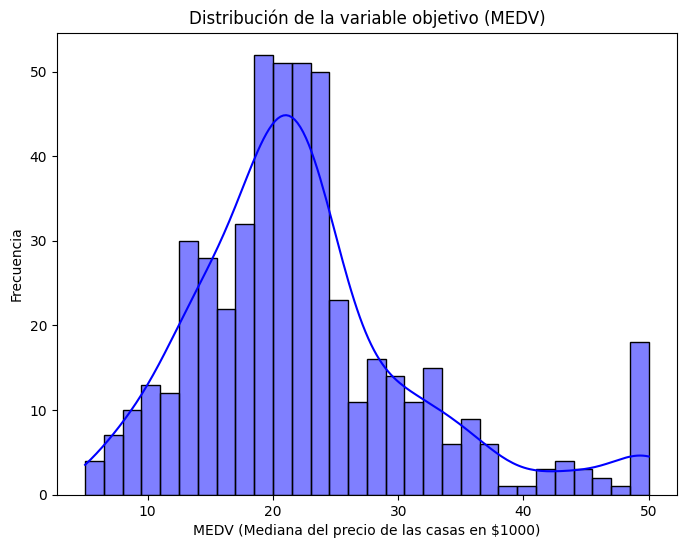

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analizar la variable objetivo (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribución de la variable objetivo (MEDV)')
plt.xlabel('MEDV (Mediana del precio de las casas en $1000)')
plt.ylabel('Frecuencia')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Dividir en características (X) y variable objetivo (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Dividir el conjunto de datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 12), (102, 12), (404,), (102,))

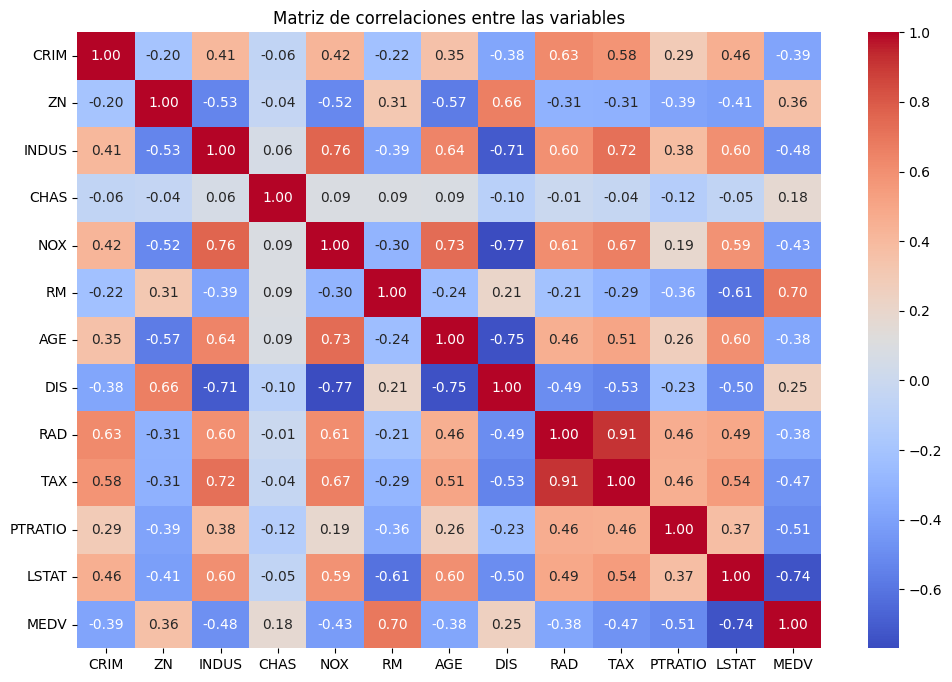

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [13]:
# Mini Análisis Exploratorio de Datos (EDA)
# Inspección de correlaciones para identificar características relevantes
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaciones entre las variables')
plt.show()

# Evaluar la correlación con la variable objetivo (MEDV)
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)
correlation_with_target


In [14]:
# Selección de características basadas en la correlación y la interpretación
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'NOX', 'CRIM', 'INDUS']

# Crear subconjuntos de datos con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Normalización para mejorar el rendimiento del modelo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Verificar las primeras filas del conjunto transformado
pd.DataFrame(X_train_scaled, columns=selected_features).head()


,RM,LSTAT,PTRATIO,TAX,NOX,CRIM,INDUS
0,-1.428069,1.753505,0.845343,1.578434,0.489252,1.287702,1.033237
1,-0.680087,-0.561474,1.204741,-0.584648,-0.157233,-0.336384,-0.413160
2,-0.402063,-0.651595,-0.637176,-0.602724,-1.008723,-0.403253,-0.715218
3,-0.300450,1.525387,0.845343,1.578434,0.489252,0.388230,1.033237
4,-0.831094,-0.165787,1.204741,-0.584648,-0.157233,-0.325282,-0.413160


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Construcción y entrenamiento del modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de evaluación
mae, mse, rmse, r2


(np.float64(3.4173668361741574),
 np.float64(28.431697759669497),
 np.float64(5.332138197727953),
 0.6122974087193638)

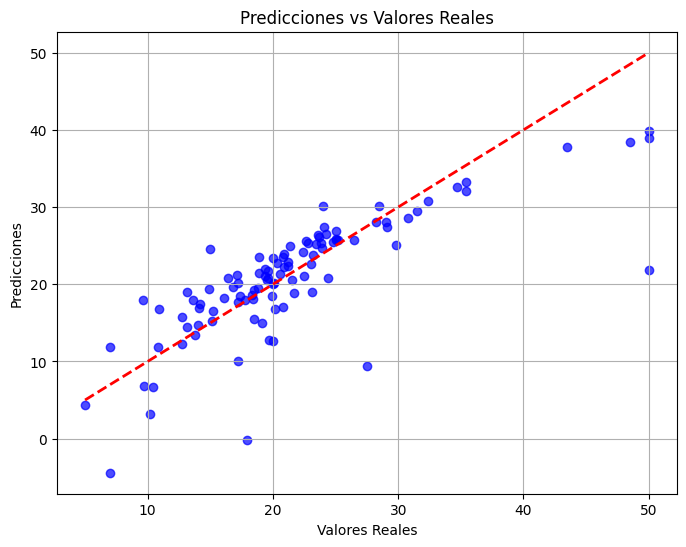

In [16]:
# Comparación gráfica de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


In [23]:
from sklearn.linear_model import Ridge

# Modelo regularizado (Ridge) con diferentes valores de hiperparámetros (alpha)
alphas = [0.1, 1.0, 10.0]
ridge_results = {}

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    
    # Evaluación del modelo Ridge
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    ridge_results[alpha] = {
        'MAE': mae_ridge,
        'MSE': mse_ridge,
        'RMSE': rmse_ridge,
        'R2': r2_ridge
    }

# Convertir los resultados en un DataFrame para visualización
ridge_results_df = pd.DataFrame(ridge_results).T
ridge_results_df.index.name = 'Alpha'

# Mostrar los resultados
df = dataframe=ridge_results_df

df 



,MAE,MSE,RMSE,R2
Alpha,,,,
0.1,3.417162,28.428530,5.331841,0.612341
1.0,3.415331,28.400311,5.329194,0.612725
10.0,3.398405,28.144917,5.305178,0.616208
